In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [10]:
#Load COVID-19 data
covid_data = pd.read_csv(r"G:\My Drive\Data Science Bootcamp\Group Project 1\United_States_COVID-19_Cases_and_Deaths.csv")
covid_data.head(10)

,year,month,tot_cases,tot_deaths
0,2020,Jan,17,0
1,2020,Feb,190,0
2,2020,Mar,78855,1631
3,2020,Apr,3183725,176291
4,2020,May,5861324,367445
5,2020,Jun,8308351,472592
6,2020,Jul,17280119,695676
7,2020,Aug,21203882,680456
8,2020,Sep,25962357,779384
9,2020,Oct,39788625,1095919


In [11]:
# Prepare COVID-19
covid_data['date_updated'] = covid_data['year'].astype(str) + '-' + covid_data['month'].astype(str)
covid_data = covid_data.groupby('date_updated')[['tot_cases', 'tot_deaths']].sum()

In [12]:
# Load employment data
employment_data = pd.read_csv(r"G:\My Drive\Data Science Bootcamp\Group Project 1\unemployment_timeseries.csv")
employment_data.head(10)

,year,month,state_and_area,tot_employed,percent_of_population,tot_unemployed,unemployment_Rate
0,2018,Jan,Alabama,"2,127,128",54.5,"88,075",4.0
1,2018,Jan,Alaska,"334,382",61.2,"22,836",6.4
2,2018,Jan,Arizona,"3,113,945",57.8,"159,220",4.9
3,2018,Jan,Arkansas,"1,290,307",55.7,"51,014",3.8
4,2018,Jan,California,"18,352,744",59.4,"844,210",4.4
5,2018,Jan,Los Angeles County,"4,875,532",60.3,"238,193",4.7
6,2018,Jan,Colorado,"2,929,572",66.3,"87,067",2.9
7,2018,Jan,Connecticut,"1,828,277",62.9,"79,987",4.2
8,2018,Jan,Delaware,"458,437",59.6,"19,619",4.1
9,2018,Jan,District of Columbia,"371,856",66.4,"23,160",5.9


In [13]:
# Prepare employment data
employment_data['date_updated'] = employment_data['year'].astype(str) + '-' + employment_data['month'].astype(str)
employment_data['Total Employed'] = employment_data['tot_employed'].str.replace(',', '').astype(int)
employment_data['Total Unemployed'] = employment_data['tot_unemployed'].str.replace(',', '').astype(int)
employment_data['Unemployment Rate'] = employment_data['unemployment_Rate']
employment_data = employment_data.groupby('date_updated')[['Total Employed', 'Total Unemployed', 'Unemployment Rate']].sum()

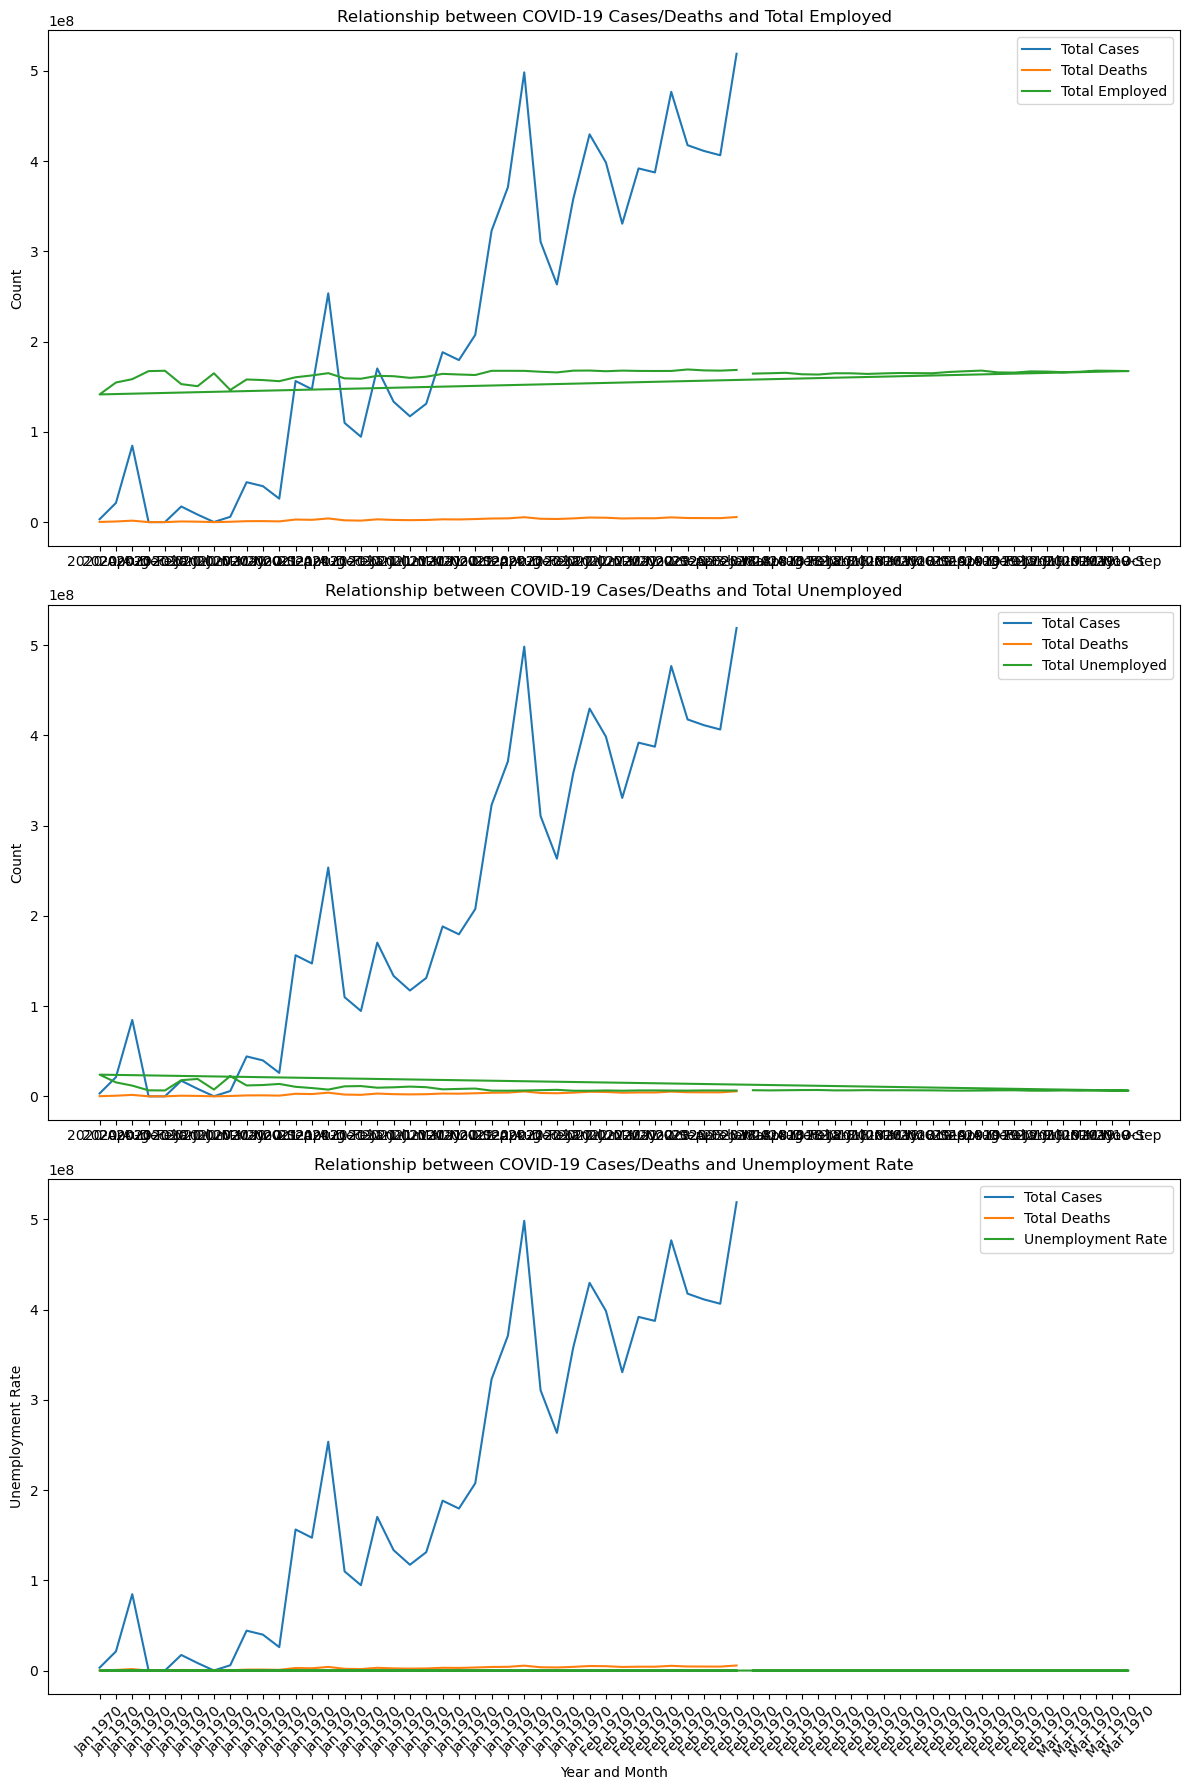

In [28]:
# Plotting the data

# Create separate figures and axes for each plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Relationship between cases & deaths with total employed
ax1.plot(covid_data.index, covid_data['tot_cases'], label='Total Cases')
ax1.plot(covid_data.index, covid_data['tot_deaths'], label='Total Deaths')
ax1.plot(employment_data.index, employment_data['Total Employed'], label='Total Employed')
ax1.set_ylabel('Count')
ax1.set_title('Relationship between COVID-19 Cases/Deaths and Total Employed')
ax1.legend()

# Plot 2: Relationship between cases & deaths with total unemployed
ax2.plot(covid_data.index, covid_data['tot_cases'], label='Total Cases')
ax2.plot(covid_data.index, covid_data['tot_deaths'], label='Total Deaths')
ax2.plot(employment_data.index, employment_data['Total Unemployed'], label='Total Unemployed')
ax2.set_ylabel('Count')
ax2.set_title('Relationship between COVID-19 Cases/Deaths and Total Unemployed')
ax2.legend()

# Plot 3: Relationship between cases & deaths with unemployment rate
ax3.plot(covid_data.index, covid_data['tot_cases'], label='Total Cases')
ax3.plot(covid_data.index, covid_data['tot_deaths'], label='Total Deaths')
ax3.plot(employment_data.index, employment_data['Unemployment Rate'], label='Unemployment Rate')
ax3.set_xlabel('Year and Month')
ax3.set_ylabel('Unemployment Rate')
ax3.set_title('Relationship between COVID-19 Cases/Deaths and Unemployment Rate')
ax3.legend()

# Format x-axis tick labels as 'Month Year'
date_fmt = mdates.DateFormatter('%b %Y')
ax3.xaxis.set_major_formatter(date_fmt)

# Rotate x-axis tick labels for better readability
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()